In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Cleaned_Online_Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,DayOfWeek,Amount
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,12,2,22.00
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,12,2,20.34
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,12,2,20.34
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,12,2,15.30
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,12,2,25.50


## Descriptive Statistics

**SUMMARY STATISTICS**

In [4]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,InvoiceNo,Quantity,UnitPrice,Month,DayOfWeek,Amount
count,475576.000000,475576.000000,475576.000000,475576.000000,475576.000000,475576.000000
mean,559767.659989,9.371913,3.321178,7.522705,2.426777,17.288717
std,13492.769109,21.986293,4.035825,3.536377,1.845938,36.207179
min,536365.000000,1.000000,0.001000,1.000000,0.000000,0.001000
25%,547577.750000,1.000000,1.250000,5.000000,1.000000,3.750000
50%,560362.000000,3.000000,2.080000,8.000000,2.000000,9.900000
75%,571716.000000,10.000000,4.130000,11.000000,4.000000,17.400000
max,581587.000000,500.000000,117.420000,12.000000,6.000000,850.000000


**DISTRIBUTION EXPLORATION**

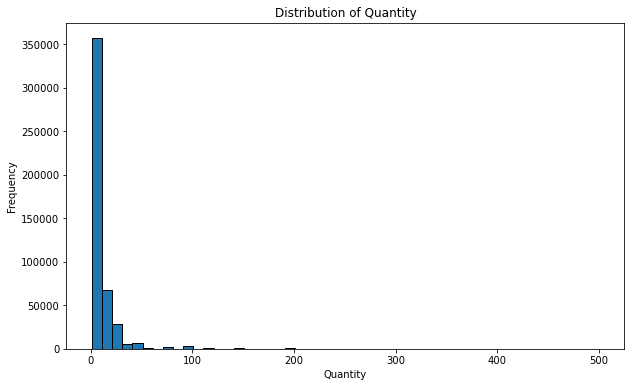

In [5]:
# Histogram for a numeric variable
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=50, edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

## Data Visualization

**UNIVARIATE ANALYSIS**

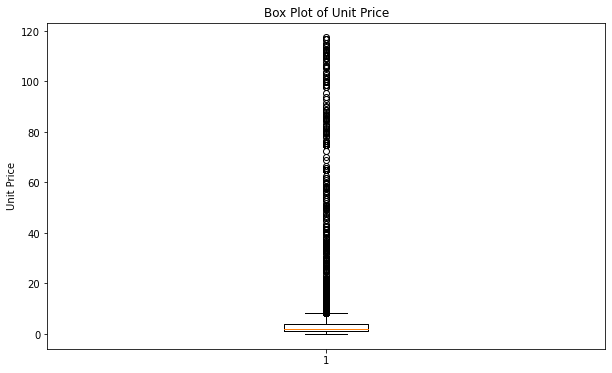

In [6]:
# Box plot for a numeric variable
plt.figure(figsize=(10, 6))
plt.boxplot(df['UnitPrice'])
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')
plt.show()

**BIVARIATE AND MULTIVARIATE ANALYSIS**

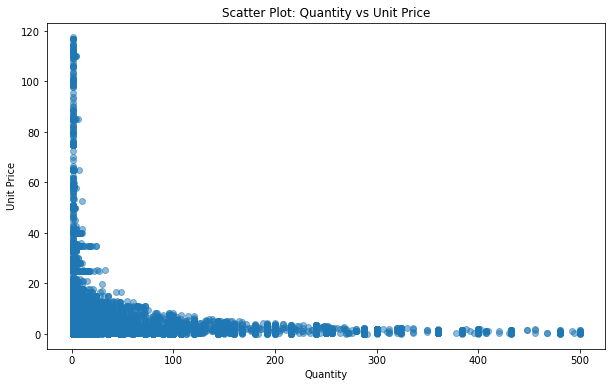

In [7]:
# Scatter plot for two numeric variables
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha = 0.5)
plt.title('Scatter Plot: Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

## Exploring Relationships and Patterns

**CORRELATION ANALYSIS**

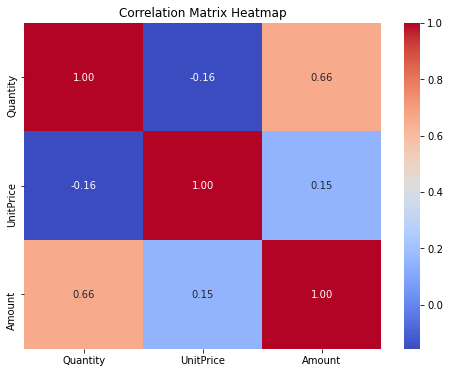

In [8]:
corr_matrix = df[['Quantity', 'UnitPrice', 'Amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

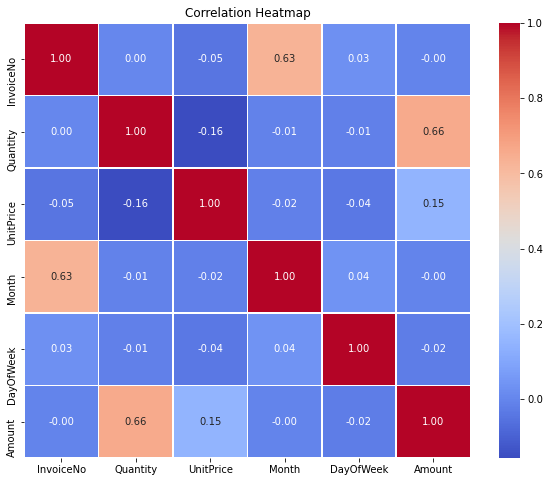

In [9]:
# Heatmap of correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**PATTERN RECOGNITION**

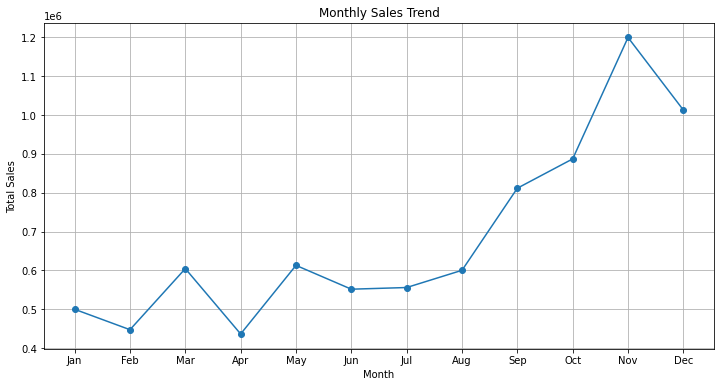

In [10]:
# Checking for seasonal trends in sales
monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# INSIGHTS

## Sales Performance

**TOTAL SALES**

In [11]:
# Total sales
total_sales = df['Amount'].sum()
total_sales

8222098.673999999

**SALES TRENDS**

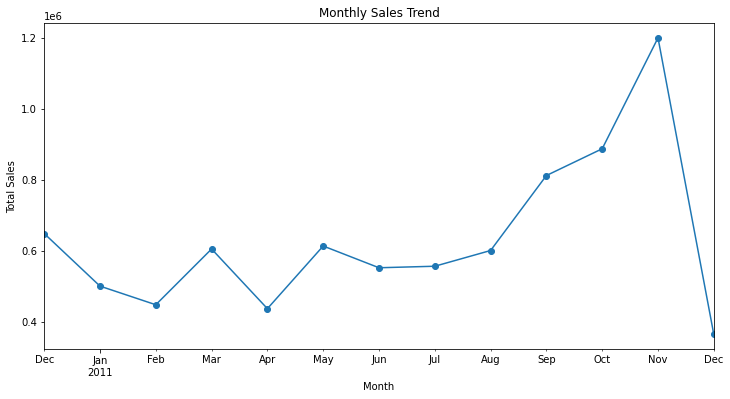

In [12]:
# Monthly sales trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**SEASONAL PATTERNS**

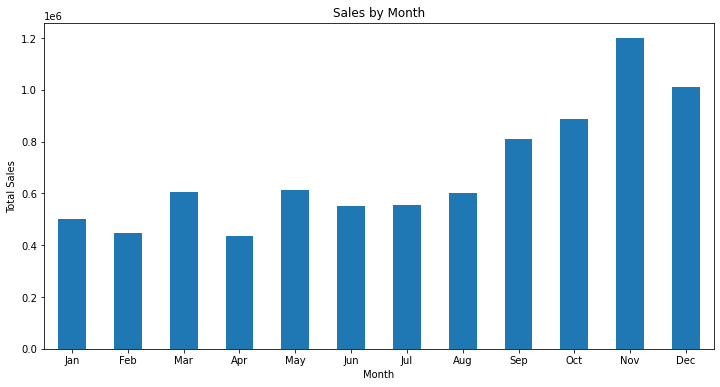

In [13]:
# Sales by month
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=0)
plt.show()

## Product Analysis

**TOP-SELLING PRODUCTS**

Description
PARTY BUNTING                        17651
RED RETROSPOT CHARLOTTE BAG          17761
CHARLOTTE BAG SUKI DESIGN            18124
JUMBO BAG PINK POLKADOT              19948
RABBIT NIGHT LIGHT                   20236
VICTORIAN GLASS HANGING T-LIGHT      22355
PACK OF 72 RETROSPOT CAKE CASES      30036
ASSORTED COLOUR BIRD ORNAMENT        31314
WORLD WAR 2 GLIDERS ASSTD DESIGNS    31527
JUMBO BAG RED RETROSPOT              44960
Name: Quantity, dtype: int64


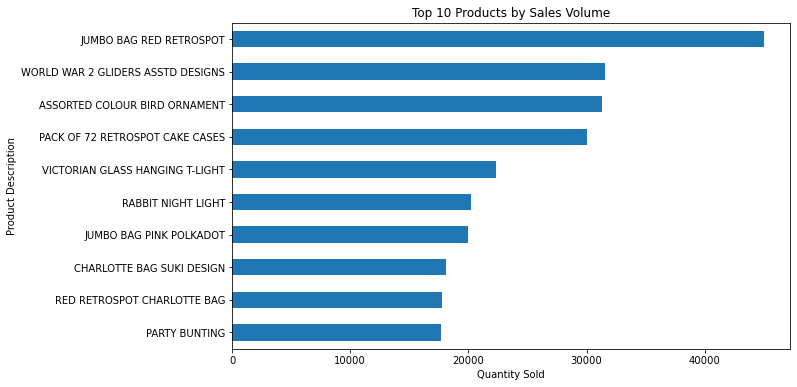

In [14]:
# Top 10 products by sales volume
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).tail(10)

print(top_products)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Sales Volume')
plt.ylabel('Product Description')
plt.xlabel('Quantity Sold')
plt.show()

Description
JAM MAKING SET WITH JARS           35157.13
JUMBO BAG PINK POLKADOT            39828.01
RABBIT NIGHT LIGHT                 43320.48
CHILLI LIGHTS                      46771.56
ASSORTED COLOUR BIRD ORNAMENT      51608.02
PAPER CHAIN KIT 50'S CHRISTMAS     52610.29
POSTAGE                            65886.19
JUMBO BAG RED RETROSPOT            87555.36
PARTY BUNTING                      92625.95
REGENCY CAKESTAND 3 TIER          146766.13
Name: Amount, dtype: float64


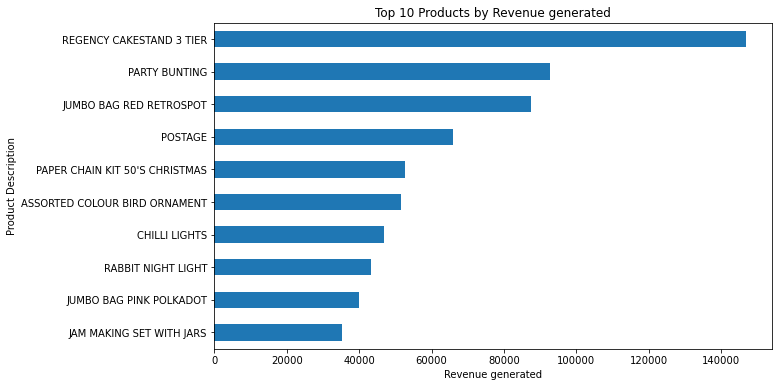

In [15]:
# Top 10 products by Revenue generated
top_products = df.groupby('Description')['Amount'].sum().sort_values(ascending=True).tail(10)

print(top_products)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Revenue generated')
plt.ylabel('Product Description')
plt.xlabel('Revenue generated')
plt.show()

**PRODUCT POPULARITY**

HEART OF WICKER SMALL               1213
JUMBO BAG PINK POLKADOT             1230
NATURAL SLATE HEART CHALKBOARD      1254
LUNCH BAG  BLACK SKULL.             1301
PACK OF 72 RETROSPOT CAKE CASES     1346
SET OF 3 CAKE TINS PANTRY DESIGN    1390
ASSORTED COLOUR BIRD ORNAMENT       1473
PARTY BUNTING                       1693
REGENCY CAKESTAND 3 TIER            1988
JUMBO BAG RED RETROSPOT             2105
Name: Description, dtype: int64


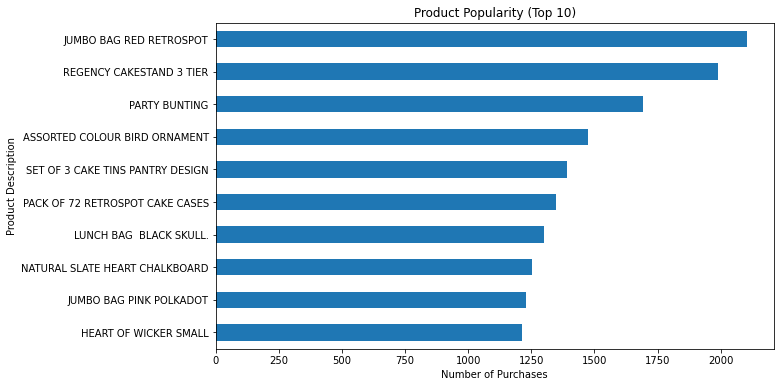

In [16]:
# Frequency of purchases for each product
product_popularity = df['Description'].value_counts(ascending = True).tail(10)

print(product_popularity)

plt.figure(figsize=(10, 6))
product_popularity.plot(kind='barh')
plt.title('Product Popularity (Top 10)')
plt.ylabel('Product Description')
plt.xlabel('Number of Purchases')
plt.show()

## Customer Insights

**CUSTOMER DEMOGRAPHICS**

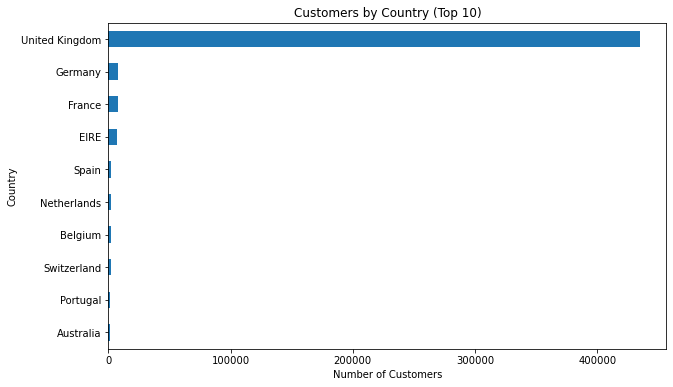

In [17]:
# Customers by country
customers_by_country = df['Country'].value_counts(ascending = True).tail(10)

plt.figure(figsize=(10, 6))
customers_by_country.plot(kind='barh')
plt.title('Customers by Country (Top 10)')
plt.ylabel('Country')
plt.xlabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

*WE WILL NOT BE ABLE TO ANALYZE ABOUT CUSTOMER SEGMENTATION AND CUSTOMER LIFETIME VALUE SINCE WE DROPPED CUSTOMERID*

##  Order Patterns

**AVERAGE ORDER VALUE**

In [18]:
# Average order value
average_order_value = df.groupby('InvoiceNo')['Amount'].sum().mean()
average_order_value

420.39567818795393

**ORDER SIZE**

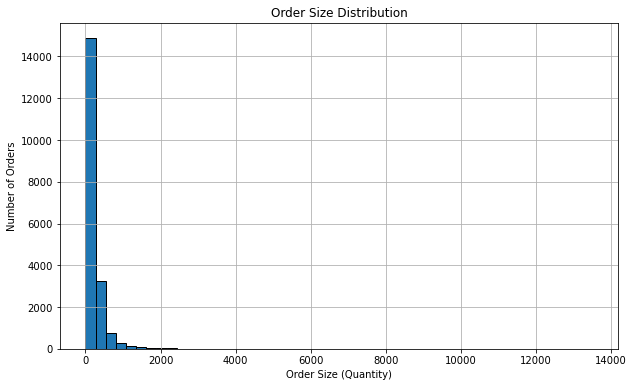

In [19]:
# Order size distribution
order_size = df.groupby('InvoiceNo')['Quantity'].sum()

plt.figure(figsize=(10, 6))
order_size.hist(bins=50, edgecolor='black')
plt.title('Order Size Distribution')
plt.xlabel('Order Size (Quantity)')
plt.ylabel('Number of Orders')
plt.show()

## Geographic Insights

**COUNTRY-WISE SALES**

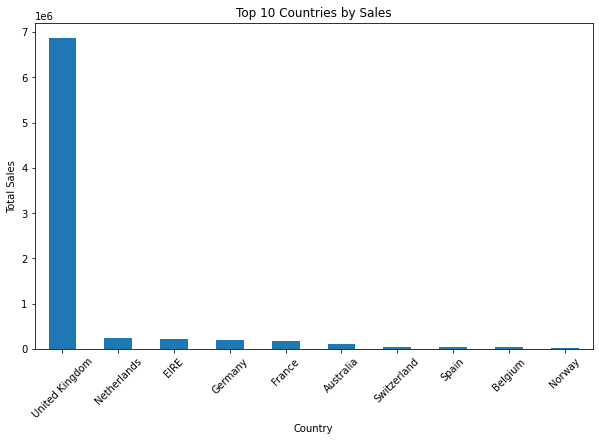

In [20]:
# Sales by country
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

**REGIONAL POPULARITY**

In [21]:
# Popular products by country
popular_products_by_region = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
popular_products_by_region = popular_products_by_region.sort_values(by=['Country', 'Quantity'], ascending=[True, False]).groupby('Country').head(3)

print("Top 3 Popular Products by Country:")
popular_products_by_region

Top 3 Popular Products by Country:


,Country,Description,Quantity
356,Australia,RED TOADSTOOL LED NIGHT LIGHT,1344
179,Australia,HOMEMADE JAM SCENTED CANDLES,1080
105,Australia,DOLLY GIRL LUNCH BOX,1024
745,Austria,SET 12 KIDS COLOUR CHALK STICKS,288
666,Austria,MINI JIGSAW PURDEY,240
...,...,...,...
14173,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,28588
17452,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,28310
17832,Unspecified,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96
17548,Unspecified,72 SWEETHEART FAIRY CAKE CASES,48


## Time-Based Analysis

**MONTHLY SALES**

Month
1     31902
2     25015
3     33057
4     26686
5     32043
6     31758
7     34284
8     30544
9     43647
10    51990
11    73855
12    60795
Name: InvoiceNo, dtype: int64


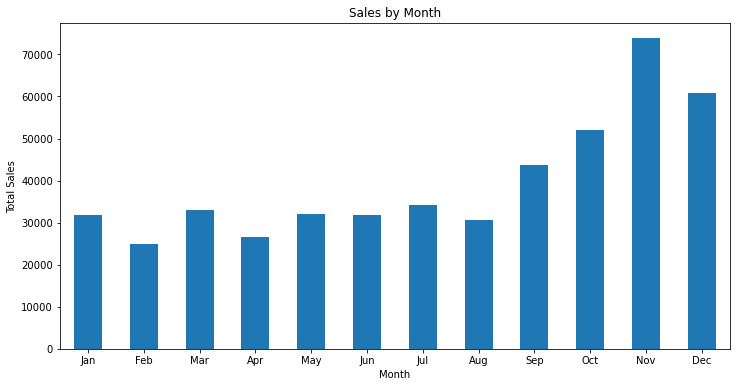

In [22]:
# Sales by month
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['InvoiceNo'].count()

print(monthly_sales)

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],rotation=0)
plt.show()

**BUSIEST DAYS**

0    84007.0
1    89603.0
2    82778.0
3    90506.0
4    72326.0
5        0.0
6    56356.0
dtype: float64


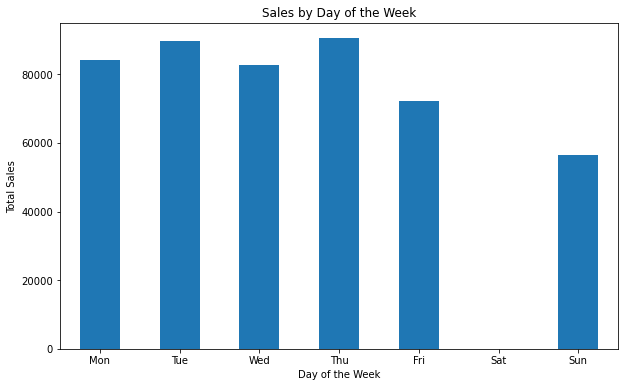

In [23]:
# Sales by day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
sales_by_day = df.groupby('DayOfWeek')['InvoiceNo'].count()

all_days = pd.Series(index=range(7), data=0)
sales_by_day = sales_by_day.add(all_days, fill_value=0)

print(sales_by_day)

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],rotation=0)
plt.show()

**PEAK HOURS**

Hour
6         1
7       339
8      7924
9     30546
10    42902
11    49990
12    68498
13    63312
14    58980
15    68835
16    48332
17    25070
18     7043
19     3097
20      707
Name: InvoiceNo, dtype: int64


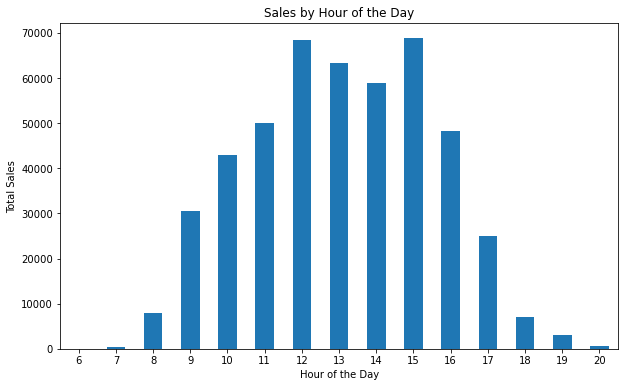

In [24]:
# Sales by hour of the day
df['Hour'] = df['InvoiceDate'].dt.hour
sales_by_hour = df.groupby('Hour')['InvoiceNo'].count()

print(sales_by_hour)

plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

## Anomalies and Outliers

**IDENTIFYING ANOMALIES**

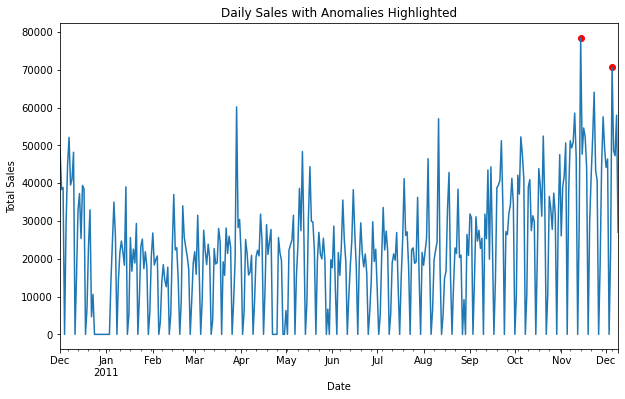

In [25]:
# Anomalies in sales volume
daily_sales = df.resample('D', on='InvoiceDate')['Amount'].sum()
anomalies = daily_sales[daily_sales > daily_sales.mean() + 3 * daily_sales.std()]

plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.scatter(anomalies.index, anomalies.values, color='red')
plt.title('Daily Sales with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

**OUTLIER DETECTION**

In [26]:
# Outlier detection using Z-score
from scipy.stats import zscore

df['Quantity_zscore'] = zscore(df['Quantity'])
df['UnitPrice_zscore'] = zscore(df['UnitPrice'])

quantity_outliers = df[abs(df['Quantity_zscore']) > 3]
unitprice_outliers = df[abs(df['UnitPrice_zscore']) > 3]

print(f"Number of Quantity Outliers: {quantity_outliers.shape[0]}")
print(f"Number of UnitPrice Outliers: {unitprice_outliers.shape[0]}")


Number of Quantity Outliers: 7251
Number of UnitPrice Outliers: 8313


**NOTE: We are already done with outlier detection in preprocessing**

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,DayOfWeek,Amount,Hour,Quantity_zscore,UnitPrice_zscore
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,12,2,22.00,8,-0.062399,-0.141527
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,12,2,20.34,8,-0.153364,0.017053
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,12,2,20.34,8,-0.153364,0.017053
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,12,2,15.30,8,-0.335296,1.072600
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,12,2,25.50,8,-0.153364,0.230144


In [28]:
df.drop(columns=['Quantity_zscore', 'UnitPrice_zscore', 'Hour', 'DayOfWeek', 'Month', ], inplace=True)

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Amount
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,15.30
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,25.50


In [30]:
columns = list(df.columns)
columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'Country',
 'Amount']

In [31]:
columns[3],columns[4],columns[6] = columns[4],columns[6],columns[3]
columns

['InvoiceNo',
 'StockCode',
 'Description',
 'InvoiceDate',
 'Country',
 'UnitPrice',
 'Quantity',
 'Amount']

In [32]:
df = df[columns]
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,Country,UnitPrice,Quantity,Amount
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2.75,8,22.00
1,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,3.39,6,20.34
2,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,3.39,6,20.34
3,536365,22752,SET 7 BABUSHKA NESTING BOXES,2010-12-01 08:26:00,United Kingdom,7.65,2,15.30
4,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,4.25,6,25.50


# CONCLUSION

### Busiest Periods:

- **Months**: The highest sales volumes are recorded in November, December, and October, indicating peak business periods possibly due to seasonal or holiday shopping.  


- **Days of the Week**: Thursday, Tuesday, and Monday are the busiest days, suggesting a trend where mid-week sees the highest customer activity.  


- **Hours of the Day**: The peak sales hours are at 3 PM, followed by 12 PM and 1 PM, indicating that most transactions occur around lunchtime and mid-afternoon.  


### Product Insights:

- **Top Products by Sales Volume**:  

    - *JUMBO BAG RED RETROSPOT*:                  44,960 units sold.  
    
    - *WORLD WAR 2 GLIDERS ASSTD DESIGNS*:        31,527 units sold.  
     
    - *ASSORTED COLOUR BIRD ORNAMENT*:            31,314 units sold.  
    
    
- **Top Products by Revenue Generated**:  

    - *REGENCY CAKESTAND 3 TIER*:                 £146,766.13.  
    
    - *PARTY BUNTING*:                            £92,625.95.  
    
    - *JUMBO BAG RED RETROSPOT*:                  £87,555.36.  
    
    
- **Top Products by Frequency of Purchases**:  

    - *JUMBO BAG RED RETROSPOT*:                  Purchased 2,105 times.  
    
    - *REGENCY CAKESTAND 3 TIER*:                 Purchased 1,988 times.  
    
    - *PARTY BUNTING*:                            Purchased 1,693 times.  


### Geographical Insights:

- **Top Countries by Revenue Generated**:  

    - *United Kingdom*: Highest revenue, indicating a strong market presence.  
    
    - *Netherlands*: Second highest revenue, showing significant sales.  
    
    - *EIRE*: Third highest revenue, also an important market.  
    
    
- **Top Countries by Sales Volume**:  

    - *United Kingdom*: Largest number of sales transactions.  
    
    - *Germany*: Second largest sales volume, highlighting it as a key market.  
    
    - *France*: Third largest sales volume, indicating substantial customer base.  
    

# RECOMMENDATIONS

### **Marketing and Promotions**:

- Focus marketing efforts and promotions during the peak months (November, December, October) to maximize sales.


- Run special promotions or sales on Thursdays, Tuesdays, and Mondays to capitalize on high customer activity.  


- Schedule targeted ads and email campaigns around peak hours (12 PM to 3 PM) to drive more sales.  


### **Product Strategy**:

- Ensure adequate stock and promote high-selling items like the JUMBO BAG RED RETROSPOT and REGENCY CAKESTAND 3 TIER to meet customer demand and maximize revenue.  


- Highlight and market top revenue-generating products to attract more purchases.  


### **Geographical Focus**:

- Concentrate on maintaining and growing market share in the United Kingdom, Netherlands, and EIRE due to their high revenue contributions.  


- Explore opportunities to boost sales in Germany and France by identifying local preferences and tailoring product offerings accordingly.  



### **Operational Improvements**:

- Optimize inventory management for peak periods to prevent stockouts of popular items.  


- Enhance customer service and support during peak days and hours to ensure a smooth shopping experience.  

